<a href="https://colab.research.google.com/github/leehyell/AIStudy24/blob/master/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**주성분 분석**
* 사진, 동영상 등은 대체적으로 용량이 커서 보관이 힘들기 때문에, 주성분만 분석해서 가지고 있으면 디스크 용량에 좋다.(차원 축소 알고리즘)
* 데이터가 가진 속성을 특성이라고 함.
    * 사진 특성
        * R : 빨강
        * G : 초록
        * B : 파랑
        * K : 검정
        * A : 필터

    * 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있다.
        * → 차원(dimension;디멘션)

###**특성이 많으면**
* 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대 적합된다.
* 차원 축소
    * 데이터를 가장 잘 나타내는 일부 특성을 선택해 데이터 크기를 줄이고, 지도 학습 모델의 성능을 향상 시키기 위함.
* 주성분 분석(**PCA**; Principal Component Analysis)
    * 줄어든 차원에서 다시 원본 차원으로 **손실은 최대한 줄이면서 복원할 수 있어야** 함.
    * 주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해하면 됨.
        * 분산: 데이터가 널리 퍼져있는 정도.
        * → 데이터를 잘 표현하는 벡터(한 개 또는 그이상의 "스칼라" 값으로 구성된 튜플)

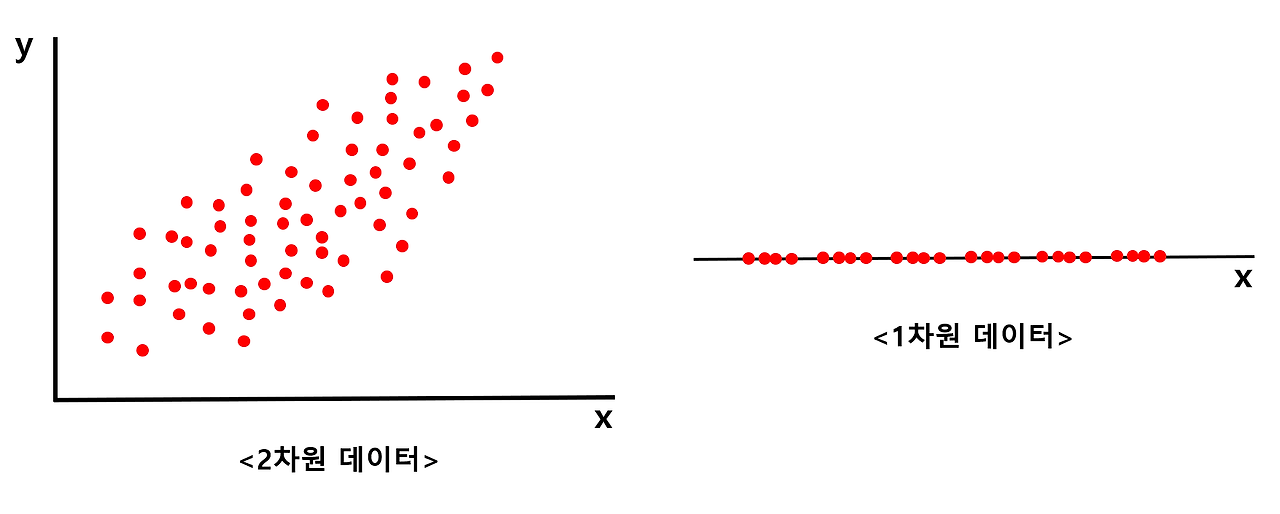
https://ddongwon.tistory.com/114

In [1]:
#KMeans 클래스
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
#-O : 대문자 o

--2025-01-08 05:50:36--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-08 05:50:36--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-08 05:50:36--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
#샘플개수, 너비*높이로 변경.(2차원 배열을 만듦.)
fruits_2d = fruits.reshape(-1, 100*100)

#사이킷런의 decomposition 모듈 아래 PCA 클래스로 활용.
from sklearn.decomposition import PCA

#PCA 클래스를 만들 때 주성분의 개수를 지정함.(50;해당 숫자는 변경 가능.)
pca = PCA(n_components=50)

#비지도 학습이므로 타겟을 제외한 학습.
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
#components_ 주성분이 들어있는 속성
print(pca.components_.shape)
#50개 속성에 10,000개 특성(100x100)

(50, 10000)


In [6]:
import matplotlib.pyplot as plt

#ratio : 비율, 비
#배열 값을 이용해 이미지로 출력해주는 메소드
def draw_fruits(arr, ratio=1):
    #n : 샘플 갯수
    n = len(arr)
    #한 줄에 10개씩 이미지를 그림. 샘플 갯수를 10으로 나눠 전체 행 갯수를 계산함.
    rows = int(np.ceil(n/10))
    #행이 1개이면 열 개수는 샘플 개수. 그렇지 않다면 10개.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            #n개까지만 그림.
            if i*10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

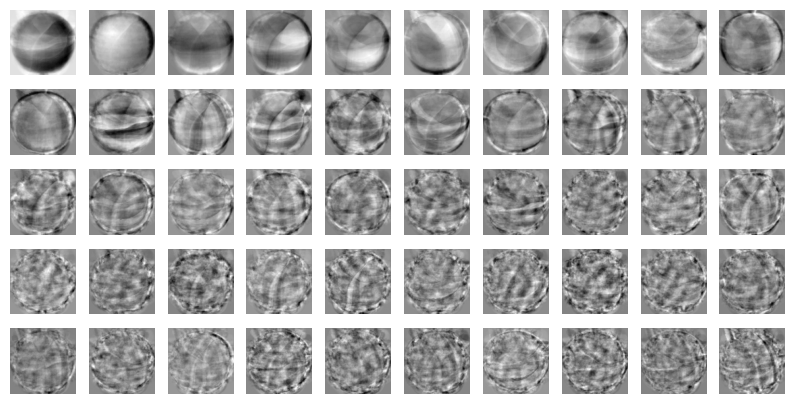

In [7]:
#10 x 5 = 50
draw_fruits(pca.components_.reshape(-1,100,100))
#주성분은 원본 데이터를 투영하여 특성의 개수를 만들어 냄.
#이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것.
#데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각해도 됨.

In [8]:
#주성분을 찾았으니, 원본 데이터를 주성분에 투영해서 특성의 개수를 10,000개에서 50개로 줄일 수 있다.
#→ 원본의 분해

#transform() 메소드를 사용하여 원본데이터의 차원을 줄여본다.
fruits_pca = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [9]:
#10,000개의 특성을 50개로 줄였으니 어느정도의 손실이 발생할 수 있다.
#하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성이 가능하다.
#원본데이터의 재구성 → inverse_transform()

#원본처럼 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


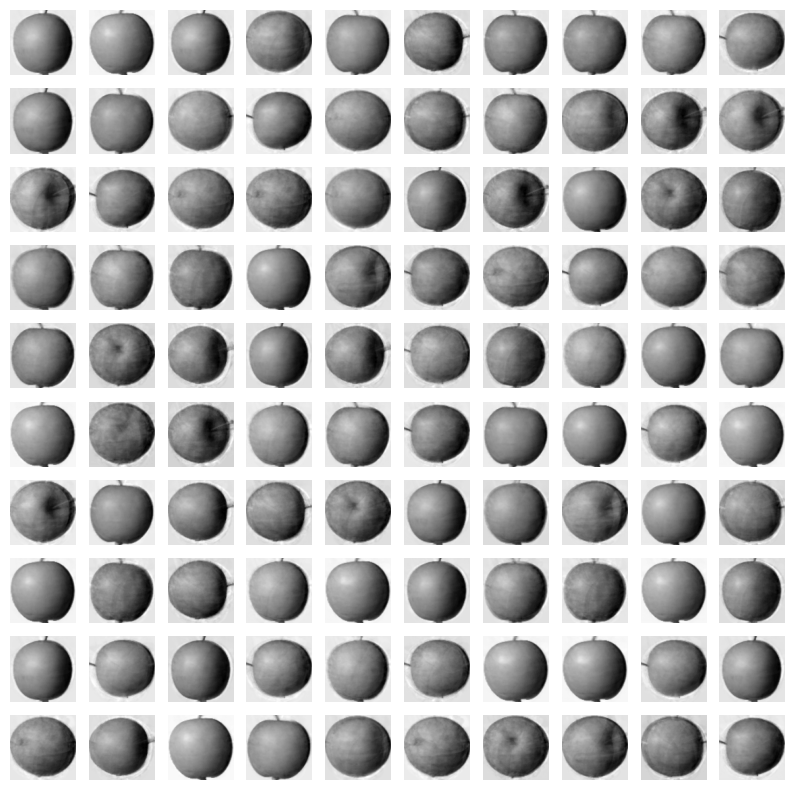

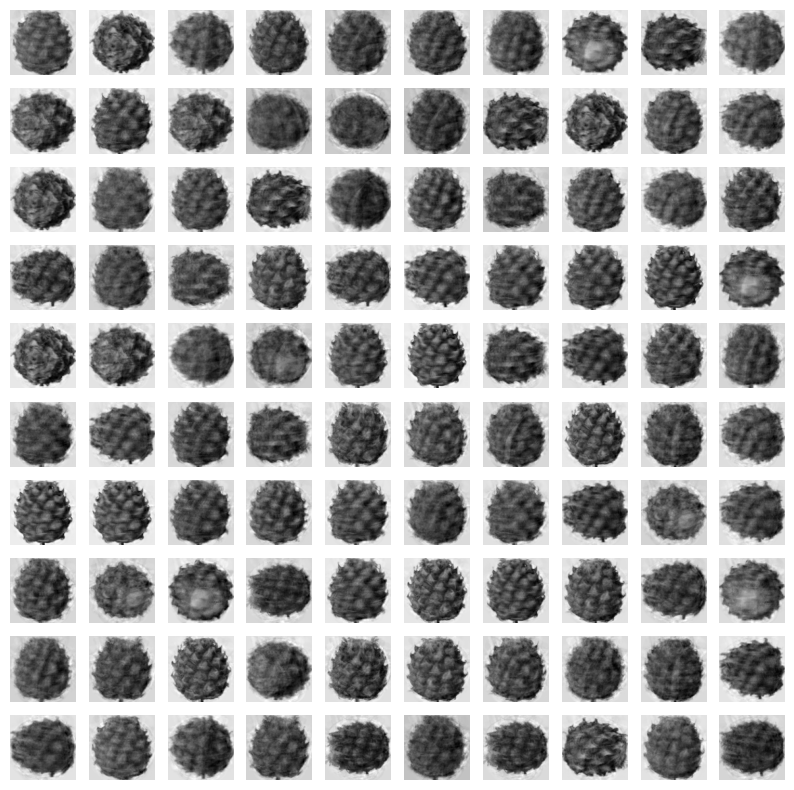

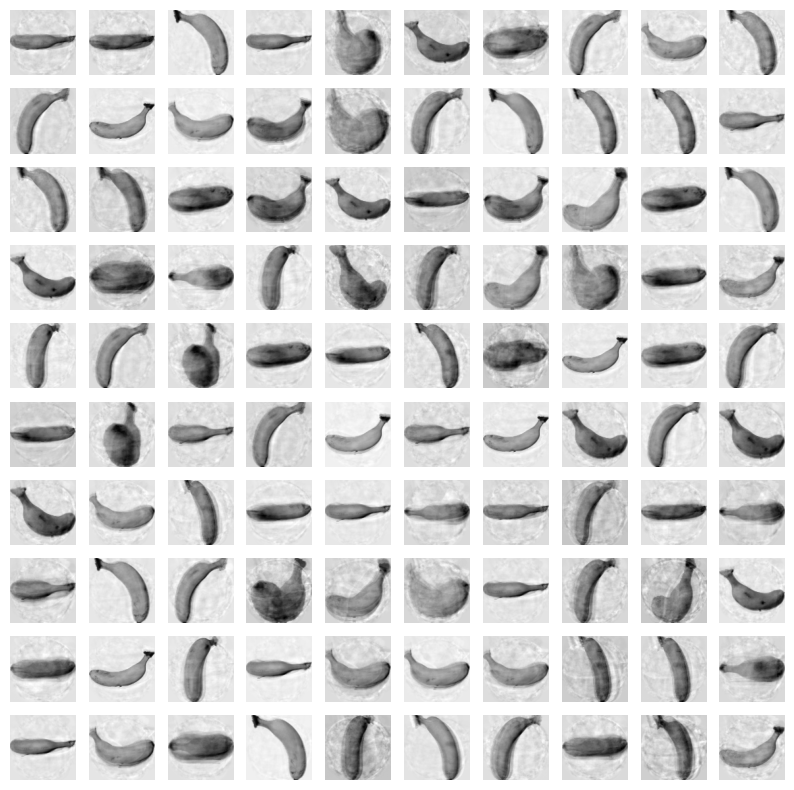

In [11]:
fruits_reconstrunct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstrunct[start:start+100])
    print('\n')

거의 모든 파일이 잘 복원된 듯 보인다.
<br/>
특징을 잘 찾아낸 것 같고, 일부 흐리고 번진 부분도 있지만 중요한 특성은 아님.
<br/>
불과 50개의 특성을 10,000개로 늘린 것을 감안하면 성공적인 듯 하다.
<br/>
만약 주성분을 최대로 사용했다면, 완벽하게 원본 데이터를 재구성할 수 있을 것이다.
<br/>
50개의 특성은 얼마나 분산을 보존하고 있을까를 알아보자.
<br/><br/>

###설명된 분산(explained variance)
* 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값.
* PCA 클래스의 explained variance_ratio에 주성분의 설명된 분산 비율이 기록되어 있음.
* 이 분산 비율을 모두 더하면 n개의 주성분으로 표현하고 있는 총 분산 비율.

In [13]:
print(np.sum(pca.explained_variance_ratio_))
#92%가 넘는 분산을 유지하고 있음.(이미지 품질)

0.9215502299953875


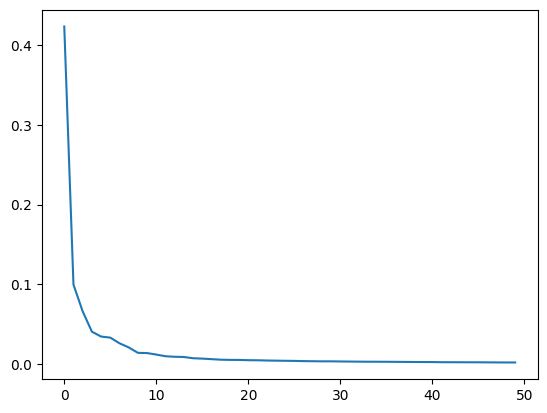

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
#그래프의 처음 10개가 주성분의 대부분을 표현하고 있음.

In [19]:
#위에 만든 주성분으로 지도 학습 모델에 적용해보자.
#전에 사용했던 로지스틱 회귀 모델을 사용.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [20]:
#지도학습 모델을 사용하기 위해 타겟 생성.
#사과 0, 파인애플 1, 바나나 2
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

#파이썬 리스트에 정수를 곱하면 리스트 안의 원소를 정수 만큼 반복.
#100개의 0, 100개의 1, 100개의 2로 이뤄진 타겟 데이터를 만듦.

In [28]:
#cross_validate 크로스 검증
from sklearn.model_selection import cross_validate

#fruits_2d 원본 데이터를 사용
scores = cross_validate(lr, fruits_2d, target)

#99% 과대 적합
print(np.mean(scores['test_score']))
#특성이 10,000개이기 때문에 300개 샘플에서는 과대 적합이 뜸.

#0.8초 정도 걸림
print(np.mean(scores['fit_time']))

0.9966666666666667
0.8956490516662597


In [29]:
#fruits_pca PCA로 축소한 자료 사용.
scores = cross_validate(lr, fruits_pca, target)

#99% 과대 적합
print(np.mean(scores['test_score']))
#0.01초 정도 걸림
print(np.mean(scores['fit_time']))
#속도가 빠르고 용량이 적어짐.
#PCA로 훈련 데이터의 차원을 축소하면 저장 공간과 시간을 절약할 수 있음.

0.9966666666666667
0.010852909088134766


In [51]:
#앞에서는 PCA 클래스를 사용할 때 n_components라는 매개변수에 주성분 개수를 50개로 진행해봤다.
#정확한 개수 대신 비율로 줄 수도 있다.(ex. 50%)

#주성분 50% - 0 ~ 1 사이의 실수로 입력
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [52]:
print(pca.n_components_)

2


In [53]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [54]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.0267611026763916


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

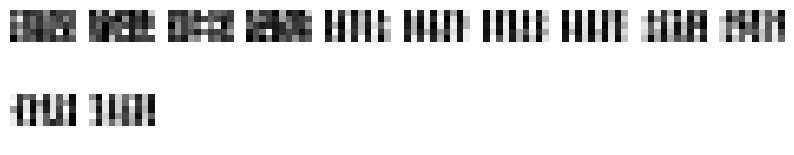

In [56]:
draw_fruits(fruits_pca.reshape(-1, 5, 10))

In [57]:
from sklearn.cluster import KMeans

#차원 축소된 데이터를 사용해 K-평균 알고리즘으로 클러스터를 찾아봄.
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [58]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


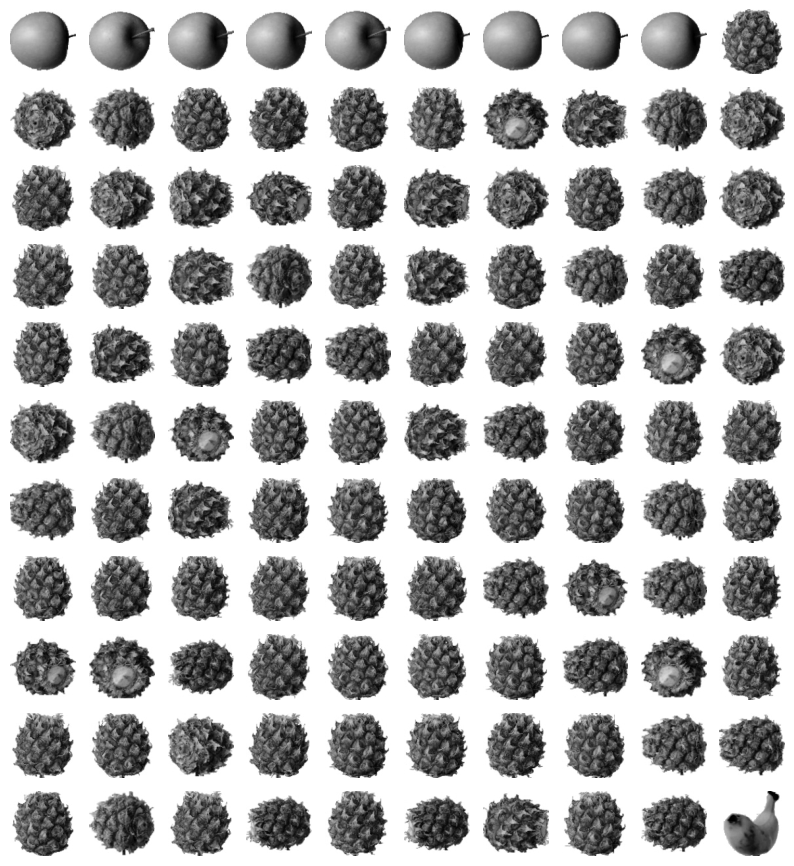

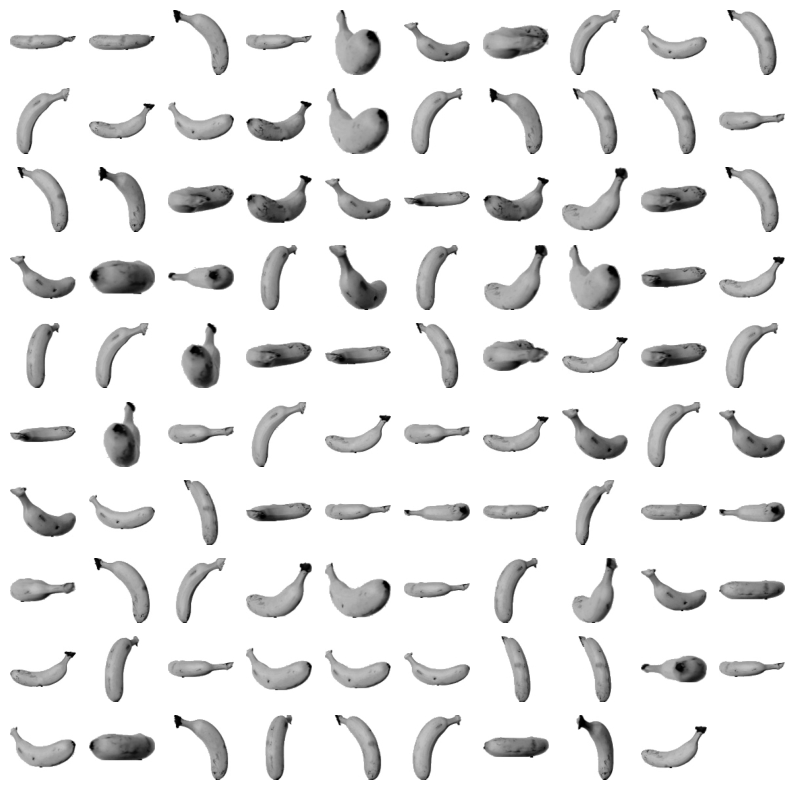

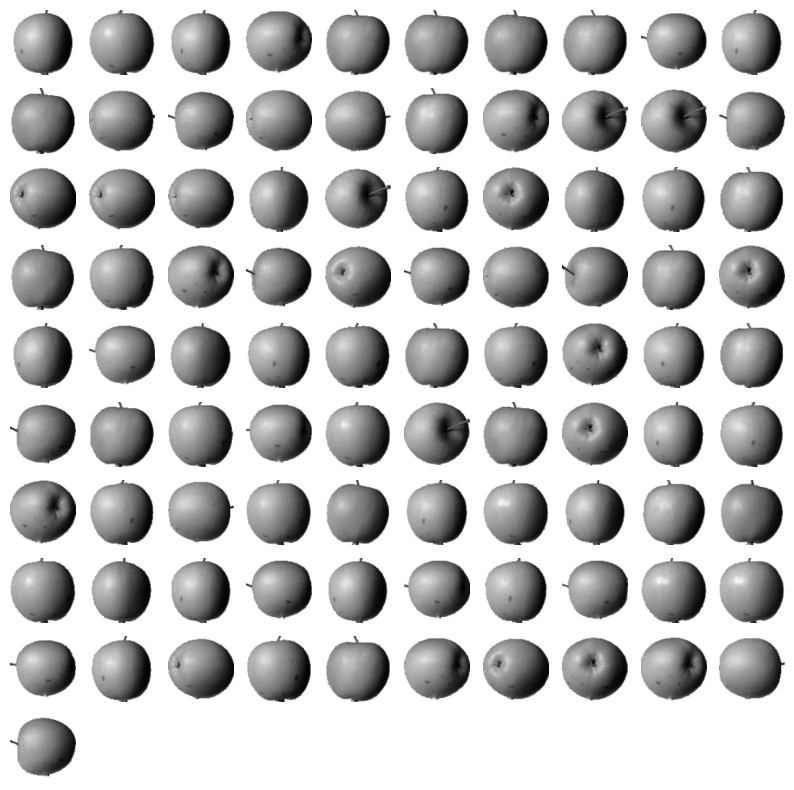

In [59]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

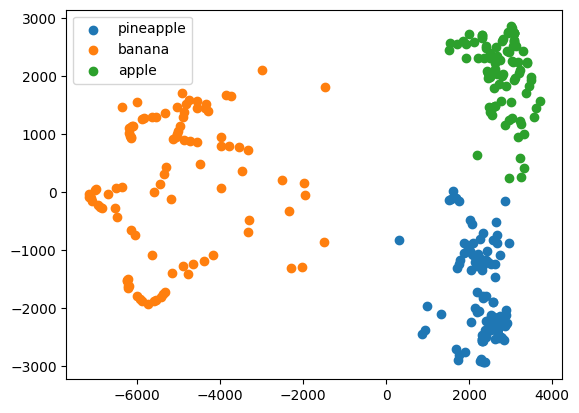

In [61]:
#훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화가 가능하다.
#3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.
#fruits_pca 데이터가 2개의 특성으로 있기 때문에 2차원으로 표현할 수 있다.

for label in range(0, 3):
    #km.labels_ 를 사용해 클러스터 별로 나눠 산점도를 그림.
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])

#범례 표시
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()